DATA ANALYSIS WITH PYTHON - PEER GRADED PROJECT

In [1]:
%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


Usage:   
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/prabhuavula7/opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: -y
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attemp

In [23]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=0)

In [24]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


QUESTION 1:

In [25]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [26]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


QUESTION 2:

In [28]:
#drop columns
df.drop(columns=['id', 'Unnamed: 0'], axis=1, inplace=True)
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [29]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [30]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [31]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [32]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


QUESTION 3:

In [33]:
#Count values
floor_counts = df['floors'].value_counts()

#Convert to DF
floor_counts_df = floor_counts.to_frame()

#I renamed the columns so I'm not confused
floor_counts_df.columns = ['Number of Houses']
print(floor_counts_df)

     Number of Houses
1.0             10680
2.0              8241
1.5              1910
3.0               613
2.5               161
3.5                 8


QUESTION 4:

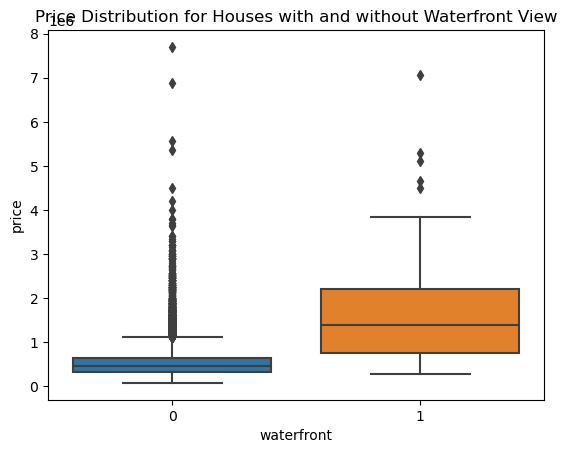

In [34]:
#Waterfront view boxplot
sns.boxplot(x='waterfront', y='price', data=df)

#Title and show
plt.title('Price Distribution for Houses with and without Waterfront View')
plt.show()


QUESTION 5:

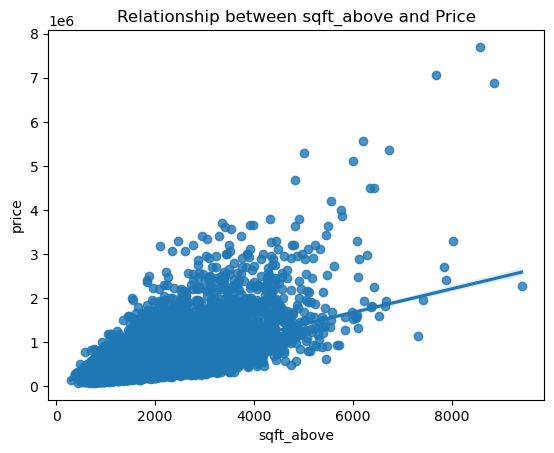

In [35]:
#Create regression plot
sns.regplot(x='sqft_above', y='price', data=df)

#Title and show
plt.title('Relationship between sqft_above and Price')
plt.show()

In [36]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

QUESTION 6:

In [37]:
#Fit a linear regression model and output the lm score
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Select the features
X = df[['sqft_living']]  # Independent variable
Y = df['price']  # Dependent variable

#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

lm = LinearRegression()

#fit model
lm.fit(X_train, Y_train)

#Calculate r^2
r_squared = lm.score(X_test, Y_test)
print(f"R^2: {r_squared}")

R^2: 0.4910058627910614


QUESTION 7:

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Add features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

#Select the features
X = df[features]  
Y = df['price'] 

#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

lm = LinearRegression()

#Fit model
lm.fit(X_train, Y_train)

#Calculate r^2
r_squared = lm.score(X_test, Y_test)
print(f"R^2: {r_squared}")

R^2: 0.6478834184390202


QUESTION 8:

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#List tuples
input_steps = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

#Create pipeline
pipeline = Pipeline(input_steps)

#Add features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

#Select the features 
X = df[features]  
Y = df['price']  

#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#Fit pipeline, calculate r^2
pipeline.fit(X_train, Y_train)
r_squared = pipeline.score(X_test, Y_test)
print(f"R^2: {r_squared}")

R^2: 0.7117277926826986


MODULE 5:

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [44]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


QUESTION 9:

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
#Create model
ridge_model = Ridge(alpha=0.1)
#Fit model
ridge_model.fit(x_train, y_train)
#Predict target
y_pred = ridge_model.predict(x_test)
#Calculate r^2
r2 = r2_score(y_test, y_pred)
print("R^2 score for Ridge Regression:", r2)


R^2 score for Ridge Regression: 0.6478759163939107


QUESTION 10:

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

#Perform second-order polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)

#Fit data after transforming
x_train_poly = poly.fit_transform(x_train)

#Transform the test data
x_test_poly = poly.transform(x_test)

#Create model, fit model and predict
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(x_train_poly, y_train)
y_pred_poly = ridge_model_poly.predict(x_test_poly)

#Calculate r^2
r2_poly = r2_score(y_test, y_pred_poly)
print("R^2 score for Ridge Regression with Polynomial Transformation:", r2_poly)

R^2 score for Ridge Regression with Polynomial Transformation: 0.7002744282316395
